<a href="https://colab.research.google.com/github/bforsbe/cryonet25/blob/main/mutation_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#@title Codon Mutation Challenge
from IPython.display import display, HTML
from textwrap import wrap
from Bio.Seq import Seq

# === Inputs ===
original_seq = "ATG AAA GTG ATT TTT CTG AAA AAA GGC GAA ATT AAA AAC GTG GCG GAT GGC TAT GCG AAC AAC TTT CTG TTT AAA CAG GGC CTG GCG ATT GAA GCG" #@param {type:"string"}
mutated_seq  = "ATG AAA GTC ATT TTT CTG AAA AAA GGC GAA ATT AAA AAC GTG GCG GAT GGC TAT GCG AAC AAC TTT CTG TTT AAA CAG GGC CTG GCG ATT GAA GCG" #@param {type:"string"}

# Clean input
original_seq = original_seq.replace(" ", "").upper()
mutated_seq  = mutated_seq.replace(" ", "").upper()

# === Checks ===
if len(original_seq) != len(mutated_seq):
    raise ValueError(f"Sequences must have the same length (got {len(original_seq)} vs {len(mutated_seq)}).")
if len(original_seq) % 3 != 0:
    raise ValueError(f"Sequence length must be a multiple of 3 (got {len(original_seq)}).")

# === Genetic code (DNA codons) ===
codon_table = {
    "TTT":"F","TTC":"F","TTA":"L","TTG":"L",
    "CTT":"L","CTC":"L","CTA":"L","CTG":"L",
    "ATT":"I","ATC":"I","ATA":"I","ATG":"M",
    "GTT":"V","GTC":"V","GTA":"V","GTG":"V",
    "TCT":"S","TCC":"S","TCA":"S","TCG":"S",
    "CCT":"P","CCC":"P","CCA":"P","CCG":"P",
    "ACT":"T","ACC":"T","ACA":"T","ACG":"T",
    "GCT":"A","GCC":"A","GCA":"A","GCG":"A",
    "TAT":"Y","TAC":"Y","TAA":"*","TAG":"*",
    "CAT":"H","CAC":"H","CAA":"Q","CAG":"Q",
    "AAT":"N","AAC":"N","AAA":"K","AAG":"K",
    "GAT":"D","GAC":"D","GAA":"E","GAG":"E",
    "TGT":"C","TGC":"C","TGA":"*","TGG":"W",
    "CGT":"R","CGC":"R","CGA":"R","CGG":"R",
    "AGT":"S","AGC":"S","AGA":"R","AGG":"R",
    "GGT":"G","GGC":"G","GGA":"G","GGG":"G"
}

def translate_dna(seq):
    codons = wrap(seq, 3)
    aa = [codon_table.get(c,"?") for c in codons]
    return codons, aa

from IPython.display import display, HTML

def compare_sequences(seq1, seq2, space_every=10, spacer=" ", no_number=False):
    """
    Display two sequences in monospace, highlight differences in bold red,
    insert spaces every n characters, and add numbering above each block.
    """
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be the same length")

    def highlight_block(s1, s2):
        """Highlight differences in one block of equal length"""
        out1, out2 = [], []
        for a, b in zip(s1, s2):
            out1.append(a)
            if a == b:
                out2.append(b)
            else:
                out2.append(f"<span style='color:red;font-weight:bold'>{b}</span>")
        return "".join(out1), "".join(out2)

    # Split into blocks of size space_every
    blocks1 = [seq1[i:i+space_every] for i in range(0, len(seq1), space_every)]
    blocks2 = [seq2[i:i+space_every] for i in range(0, len(seq2), space_every)]

    seq1_blocks, seq2_blocks, num_blocks = [], [], []
    pos = 0
    for b1, b2 in zip(blocks1, blocks2):
        o1, o2 = highlight_block(b1, b2)
        seq1_blocks.append(o1)
        seq2_blocks.append(o2)
        pos += len(b1)
        num_blocks.append(str(pos).rjust(len(b1)))


    number_line = spacer.join(num_blocks)
    seq1_line   = spacer.join(seq1_blocks)
    seq2_line   = spacer.join(seq2_blocks)

    html = []
    if no_number:
        html = seq1_line + "<br>" + seq2_line
    else:
        html = number_line + "<br>" + seq1_line + "<br>" + seq2_line
    display(HTML(f"<pre style='font-family:monospace'>{html}</pre>"))

def dna_identity(seq1: str, seq2: str) -> float:
    """Return % identity at DNA level"""
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must have the same length")
    matches = sum(a == b for a, b in zip(seq1.upper(), seq2.upper()))
    return 100 * matches / len(seq1)

def protein_identity(seq1: str, seq2: str) -> float:
    """Translate DNA → protein and return % identity"""
    if len(seq1) % 3 != 0 or len(seq2) % 3 != 0:
        raise ValueError("DNA sequences must be divisible by 3")
    prot1 = str(Seq(seq1).translate(to_stop=False))
    prot2 = str(Seq(seq2).translate(to_stop=False))
    if len(prot1) != len(prot2):
        raise ValueError("Translated proteins have different lengths")
    matches = sum(a == b for a, b in zip(prot1, prot2))
    return 100 * matches / len(prot1)


# === Translation ===
codons_o, aa_o = translate_dna(original_seq)
codons_m, aa_m = translate_dna(mutated_seq)

# === HTML display ===

compare_sequences(original_seq,mutated_seq,space_every=3)
compare_sequences(aa_o,aa_m,space_every=1, no_number=True, spacer="   ")

#display(HTML(f"<pre style='font-family:monospace'>{"   ".join(aa_o)}</pre>"))
#compare_sequences("".join(codons_o),"".join(codons_m),space_every=30)

print("\n\nMutaded sequence without spaces:")
display(HTML(f"<pre style='font-family:monospace'>{"".join(aa_m)}</pre>"))

dna_id = dna_identity(original_seq, mutated_seq)
#print(f"\nDNA % identity: {dna_id:.1f}%")
protein_id = protein_identity(original_seq, mutated_seq)
#print(f"Protein % identity: {protein_id:.1f}%")
print("\n")
print(f"Mutation score is {((100.-protein_id)+(100.-dna_id))/2:.2f}")




Mutaded sequence without spaces:




Mutation score is 0.52


#**ESMFold**
for more details see: [Github](https://github.com/facebookresearch/esm/tree/main/esm), [Preprint](https://www.biorxiv.org/content/10.1101/2022.07.20.500902v1)

#### **Tips and Instructions**
- click the little ▶ play icon to the left of each cell below.
- use "/" to specify chainbreaks, (eg. sequence="AAA/AAA")
- for homo-oligomeric predictions, set copies > 1
- See [experimental notebook](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/beta/ESMFold_advanced.ipynb) for more advanced options (like sampling).

#### **Colab Limitations**
- For short monomeric proteins under the length 400, consider using [ESMFold API](https://esmatlas.com/resources?action=fold) (no need for GPU, super fast!)
- On Tesla T4 (typical free colab GPU), max total length ~ 900

In [1]:
%%time
#@title install
#@markdown install ESMFold, OpenFold and download Params (~2min 30s)
version = "1" # @param ["0", "1"]
model_name = "esmfold_v0.model" if version == "0" else "esmfold.model"
import os, time
if not os.path.isfile(model_name):
  # download esmfold params
  os.system("apt-get install aria2 -qq")
  os.system(f"aria2c -q -x 16 https://colabfold.steineggerlab.workers.dev/esm/{model_name} &")

  if not os.path.isfile("finished_install"):
    # install libs
    print("installing libs...")
    os.system("pip install -q omegaconf pytorch_lightning biopython ml_collections einops py3Dmol modelcif")
    os.system("pip install -q git+https://github.com/NVIDIA/dllogger.git")

    print("installing openfold...")
    # install openfold
    os.system(f"pip install -q git+https://github.com/sokrypton/openfold.git")

    print("installing esmfold...")
    # install esmfold
    os.system(f"pip install -q git+https://github.com/sokrypton/esm.git")
    os.system("touch finished_install")

  # wait for Params to finish downloading...
  while not os.path.isfile(model_name):
    time.sleep(5)
  if os.path.isfile(f"{model_name}.aria2"):
    print("downloading params...")
  while os.path.isfile(f"{model_name}.aria2"):
    time.sleep(5)

installing libs...
installing openfold...
installing esmfold...
CPU times: user 4.6 ms, sys: 12 ms, total: 16.6 ms
Wall time: 3min 43s


In [28]:
#@title ##run **ESMFold**
%%time
from string import ascii_uppercase, ascii_lowercase
import hashlib, re, os
import numpy as np
import torch
from jax.tree_util import tree_map
import matplotlib.pyplot as plt
from scipy.special import softmax
import gc

def parse_output(output):
  pae = (output["aligned_confidence_probs"][0] * np.arange(64)).mean(-1) * 31
  plddt = output["plddt"][0,:,1]

  bins = np.append(0,np.linspace(2.3125,21.6875,63))
  sm_contacts = softmax(output["distogram_logits"],-1)[0]
  sm_contacts = sm_contacts[...,bins<8].sum(-1)
  xyz = output["positions"][-1,0,:,1]
  mask = output["atom37_atom_exists"][0,:,1] == 1
  o = {"pae":pae[mask,:][:,mask],
       "plddt":plddt[mask],
       "sm_contacts":sm_contacts[mask,:][:,mask],
       "xyz":xyz[mask]}
  return o

def get_hash(x): return hashlib.sha1(x.encode()).hexdigest()
alphabet_list = list(ascii_uppercase+ascii_lowercase)

jobname = "test" #@param {type:"string"}
jobname = re.sub(r'\W+', '', jobname)[:50]

sequence = "MKVLFLKKGEIKNVADGYANNFLFKQGLAIEA" #@param {type:"string"}
sequence = re.sub("[^A-Z:]", "", sequence.replace("/",":").upper())
sequence = re.sub(":+",":",sequence)
sequence = re.sub("^[:]+","",sequence)
sequence = re.sub("[:]+$","",sequence)
copies = 1 #@param {type:"integer"}
if copies == "" or copies <= 0: copies = 1
sequence = ":".join([sequence] * copies)
num_recycles = 3 #@param ["0", "1", "2", "3", "6", "12", "24"] {type:"raw"}
chain_linker = 25

ID = jobname+"_"+get_hash(sequence)[:5]
seqs = sequence.split(":")
lengths = [len(s) for s in seqs]
length = sum(lengths)
print("length",length)

u_seqs = list(set(seqs))
if len(seqs) == 1: mode = "mono"
elif len(u_seqs) == 1: mode = "homo"
else: mode = "hetero"

if "model" not in dir() or model_name != model_name_:
  if "model" in dir():
    # delete old model from memory
    del model
    gc.collect()
    if torch.cuda.is_available():
      torch.cuda.empty_cache()

  model = torch.load(model_name, weights_only=False)
  model.eval().cuda().requires_grad_(False)
  model_name_ = model_name

# optimized for Tesla T4
if length > 700:
  model.set_chunk_size(64)
else:
  model.set_chunk_size(128)

torch.cuda.empty_cache()
output = model.infer(sequence,
                     num_recycles=num_recycles,
                     chain_linker="X"*chain_linker,
                     residue_index_offset=512)

pdb_str = model.output_to_pdb(output)[0]
output = tree_map(lambda x: x.cpu().numpy(), output)
ptm = output["ptm"][0]
plddt = output["plddt"][0,...,1].mean()
O = parse_output(output)
print(f'ptm: {ptm:.3f} plddt: {plddt:.3f}')
os.system(f"mkdir -p {ID}")
prefix = f"{ID}/ptm{ptm:.3f}_r{num_recycles}_default"
np.savetxt(f"{prefix}.pae.txt",O["pae"],"%.3f")
o_pdb_file=f"{prefix}.pdb"
with open(o_pdb_file,"w") as out:
  out.write(pdb_str)

length 32
ptm: 0.645 plddt: 94.926
CPU times: user 1.7 s, sys: 2.72 ms, total: 1.7 s
Wall time: 1.7 s


/usr/local/lib/python3.12/dist-packages/openfold/utils/tensor_utils.py:92: UserWarning: Using a non-tuple sequence for multidimensional indexing is deprecated and will be changed in pytorch 2.9; use x[tuple(seq)] instead of x[seq]. In pytorch 2.9 this will be interpreted as tensor index, x[torch.tensor(seq)], which will result either in an error or a different result (Triggered internally at /pytorch/torch/csrc/autograd/python_variable_indexing.cpp:306.)
  return data[ranges]


In [27]:
import os, re, requests
import torch
from jax.tree_util import tree_map
from Bio.Seq import Seq
from Bio.PDB import PDBParser, Superimposer
import numpy as np

# --- Function for RMSD ---
def structure_rmsd(pdb1: str, pdb2: str) -> float:
    parser = PDBParser(QUIET=True)
    s1 = parser.get_structure("ref", pdb1)
    s2 = parser.get_structure("pred", pdb2)

    atoms1, atoms2 = [], []
    for a1, a2 in zip(s1.get_atoms(), s2.get_atoms()):
        if a1.get_id() in ["N", "CA", "C"]:  # backbone only
            atoms1.append(a1)
            atoms2.append(a2)

    if len(atoms1) != len(atoms2):
        raise ValueError("Structures must have same number of backbone atoms")

    sup = Superimposer()
    sup.set_atoms(atoms1, atoms2)
    return sup.rms

# --- Download reference PDB ---
ref_file="reference.pdb"
!wget -O reference.pdb https://raw.githubusercontent.com/bforsbe/cryonet25/main/ptm0.638_r3_default.pdb

# --- Compare ---
o_pdb_file="test_a2395/ptm0.638_r3_default.pdb"
print(f"input file is {o_pdb_file}")
#protein_seq = "MKVIFLKKGEIKNVADGYANNFLFKQGLAIEA
rmsd_val = structure_rmsd(ref_file, o_pdb_file)
#print(f"Protein sequence: {protein_seq}")
print(f"RMSD vs reference: {rmsd_val:.3f} Å")

--2025-08-19 20:24:08--  https://raw.githubusercontent.com/bforsbe/cryonet25/main/ptm0.638_r3_default.pdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20373 (20K) [text/plain]
Saving to: ‘reference.pdb’

reference.pdb       100%[===================>]  19.90K  --.-KB/s    in 0.002s  

2025-08-19 20:24:08 (11.5 MB/s) - ‘reference.pdb’ saved [20373/20373]

input file is test_a2395/ptm0.638_r3_default.pdb
RMSD vs reference: 0.000 Å


In [22]:
from Bio.PDB import PDBParser, Superimposer, PPBuilder

# Load structures
parser = PDBParser(QUIET=True)
ref_structure = parser.get_structure("ref", "reference.pdb")
pred_structure = parser.get_structure("pred", pdb_str)

# Select atoms (usually backbone: N, CA, C, O)
ref_atoms = []
pred_atoms = []

for ref_res, pred_res in zip(ref_structure[0]["A"], pred_structure[0]["A"]):
    if ref_res.has_id("CA") and pred_res.has_id("CA"):  # use alpha carbons
        ref_atoms.append(ref_res["CA"])
        pred_atoms.append(pred_res["CA"])

# Superimpose
sup = Superimposer()
sup.set_atoms(ref_atoms, pred_atoms)
sup.apply(pred_structure.get_atoms())

print(f"RMSD: {sup.rms:.3f} Å")

OSError: [Errno 36] File name too long: 'PARENT N/A\nATOM      1  N   MET A   1      -6.170  -7.770   1.344  1.00 93.76           N  \nATOM      2  CA  MET A   1      -5.898  -7.356   2.717  1.00 94.04           C  \nATOM      3  C   MET A   1      -6.200  -5.874   2.909  1.00 94.69           C  \nATOM      4  CB  MET A   1      -4.442  -7.646   3.088  1.00 91.60           C  \nATOM      5  O   MET A   1      -6.172  -5.101   1.950  1.00 93.73           O  \nATOM      6  CG  MET A   1      -3.436  -6.783   2.343  1.00 80.00           C  \nATOM      7  SD  MET A   1      -1.700  -7.222   2.743  1.00 70.55           S  \nATOM      8  CE  MET A   1      -1.661  -8.939   2.156  1.00 69.74           C  \nATOM      9  N   LYS A   2      -6.599  -5.431   3.986  1.00 95.80           N  \nATOM     10  CA  LYS A   2      -6.886  -4.054   4.376  1.00 96.00           C  \nATOM     11  C   LYS A   2      -5.621  -3.340   4.844  1.00 95.94           C  \nATOM     12  CB  LYS A   2      -7.947  -4.017   5.478  1.00 94.97           C  \nATOM     13  O   LYS A   2      -4.883  -3.861   5.683  1.00 95.43           O  \nATOM     14  CG  LYS A   2      -8.489  -2.625   5.769  1.00 86.65           C  \nATOM     15  CD  LYS A   2      -9.599  -2.665   6.812  1.00 82.11           C  \nATOM     16  CE  LYS A   2     -10.196  -1.284   7.046  1.00 80.93           C  \nATOM     17  NZ  LYS A   2     -11.327  -1.328   8.020  1.00 70.78           N  \nATOM     18  N   VAL A   3      -5.353  -2.202   4.207  1.00 95.03           N  \nATOM     19  CA  VAL A   3      -4.110  -1.508   4.526  1.00 95.38           C  \nATOM     20  C   VAL A   3      -4.400  -0.037   4.819  1.00 94.98           C  \nATOM     21  CB  VAL A   3      -3.080  -1.630   3.381  1.00 94.41           C  \nATOM     22  O   VAL A   3      -5.432   0.493   4.403  1.00 94.15           O  \nATOM     23  CG1 VAL A   3      -2.753  -3.096   3.104  1.00 85.54           C  \nATOM     24  CG2 VAL A   3      -3.604  -0.949   2.118  1.00 84.45           C  \nATOM     25  N   ILE A   4      -3.530   0.635   5.581  1.00 95.05           N  \nATOM     26  CA  ILE A   4      -3.494   2.078   5.794  1.00 95.30           C  \nATOM     27  C   ILE A   4      -2.356   2.692   4.981  1.00 95.22           C  \nATOM     28  CB  ILE A   4      -3.330   2.424   7.291  1.00 94.33           C  \nATOM     29  O   ILE A   4      -1.182   2.416   5.238  1.00 94.62           O  \nATOM     30  CG1 ILE A   4      -4.429   1.748   8.119  1.00 88.67           C  \nATOM     31  CG2 ILE A   4      -3.341   3.941   7.500  1.00 88.04           C  \nATOM     32  CD1 ILE A   4      -4.165   1.752   9.619  1.00 82.29           C  \nATOM     33  N   PHE A   5      -2.663   3.500   3.947  1.00 93.06           N  \nATOM     34  CA  PHE A   5      -1.646   4.228   3.197  1.00 94.01           C  \nATOM     35  C   PHE A   5      -1.079   5.374   4.027  1.00 93.25           C  \nATOM     36  CB  PHE A   5      -2.227   4.768   1.886  1.00 92.21           C  \nATOM     37  O   PHE A   5      -1.829   6.207   4.541  1.00 92.16           O  \nATOM     38  CG  PHE A   5      -2.460   3.707   0.844  1.00 85.50           C  \nATOM     39  CD1 PHE A   5      -1.509   3.457  -0.137  1.00 78.06           C  \nATOM     40  CD2 PHE A   5      -3.630   2.960   0.846  1.00 79.69           C  \nATOM     41  CE1 PHE A   5      -1.721   2.476  -1.103  1.00 84.65           C  \nATOM     42  CE2 PHE A   5      -3.850   1.978  -0.115  1.00 83.91           C  \nATOM     43  CZ  PHE A   5      -2.895   1.738  -1.090  1.00 84.90           C  \nATOM     44  N   LEU A   6       0.127   5.418   4.151  1.00 94.20           N  \nATOM     45  CA  LEU A   6       0.788   6.292   5.114  1.00 93.99           C  \nATOM     46  C   LEU A   6       0.783   7.737   4.628  1.00 93.50           C  \nATOM     47  CB  LEU A   6       2.227   5.828   5.359  1.00 93.21           C  \nATOM     48  O   LEU A   6       0.779   8.668   5.437  1.00 92.13           O  \nATOM     49  CG  LEU A   6       2.395   4.473   6.047  1.00 90.40           C  \nATOM     50  CD1 LEU A   6       3.865   4.067   6.068  1.00 86.76           C  \nATOM     51  CD2 LEU A   6       1.827   4.518   7.462  1.00 86.68           C  \nATOM     52  N   LYS A   7       0.842   7.971   3.352  1.00 93.29           N  \nATOM     53  CA  LYS A   7       0.926   9.328   2.821  1.00 92.89           C  \nATOM     54  C   LYS A   7      -0.349  10.113   3.116  1.00 92.19           C  \nATOM     55  CB  LYS A   7       1.188   9.300   1.315  1.00 91.34           C  \nATOM     56  O   LYS A   7      -0.291  11.231   3.631  1.00 90.08           O  \nATOM     57  CG  LYS A   7       1.450  10.670   0.707  1.00 83.48           C  \nATOM     58  CD  LYS A   7       1.786  10.569  -0.776  1.00 78.24           C  \nATOM     59  CE  LYS A   7       2.017  11.942  -1.392  1.00 74.52           C  \nATOM     60  NZ  LYS A   7       2.387  11.846  -2.836  1.00 67.81           N  \nATOM     61  N   LYS A   8      -1.548   9.629   2.889  1.00 89.59           N  \nATOM     62  CA  LYS A   8      -2.804  10.359   3.038  1.00 88.28           C  \nATOM     63  C   LYS A   8      -3.622   9.815   4.205  1.00 86.79           C  \nATOM     64  CB  LYS A   8      -3.622  10.289   1.747  1.00 84.90           C  \nATOM     65  O   LYS A   8      -4.647  10.391   4.574  1.00 83.20           O  \nATOM     66  CG  LYS A   8      -3.053  11.121   0.607  1.00 75.06           C  \nATOM     67  CD  LYS A   8      -4.032  11.220  -0.555  1.00 71.84           C  \nATOM     68  CE  LYS A   8      -3.510  12.140  -1.650  1.00 65.02           C  \nATOM     69  NZ  LYS A   8      -4.486  12.277  -2.772  1.00 59.33           N  \nATOM     70  N   GLY A   9      -3.098   8.783   4.783  1.00 89.03           N  \nATOM     71  CA  GLY A   9      -3.855   8.185   5.871  1.00 90.06           C  \nATOM     72  C   GLY A   9      -5.116   7.482   5.405  1.00 86.45           C  \nATOM     73  O   GLY A   9      -6.059   7.309   6.180  1.00 80.62           O  \nATOM     74  N   GLU A  10      -5.183   7.049   4.141  1.00 93.36           N  \nATOM     75  CA  GLU A  10      -6.365   6.401   3.581  1.00 93.22           C  \nATOM     76  C   GLU A  10      -6.293   4.886   3.745  1.00 92.93           C  \nATOM     77  CB  GLU A  10      -6.527   6.763   2.103  1.00 89.96           C  \nATOM     78  O   GLU A  10      -5.228   4.288   3.577  1.00 91.53           O  \nATOM     79  CG  GLU A  10      -6.805   8.239   1.858  1.00 75.06           C  \nATOM     80  CD  GLU A  10      -7.052   8.569   0.395  1.00 72.15           C  \nATOM     81  OE1 GLU A  10      -6.768   7.715  -0.476  1.00 69.12           O  \nATOM     82  OE2 GLU A  10      -7.534   9.690   0.116  1.00 66.84           O  \nATOM     83  N   ILE A  11      -7.474   4.318   4.108  1.00 94.14           N  \nATOM     84  CA  ILE A  11      -7.596   2.869   4.227  1.00 94.55           C  \nATOM     85  C   ILE A  11      -8.186   2.294   2.941  1.00 94.13           C  \nATOM     86  CB  ILE A  11      -8.466   2.473   5.440  1.00 92.91           C  \nATOM     87  O   ILE A  11      -9.228   2.754   2.469  1.00 93.11           O  \nATOM     88  CG1 ILE A  11      -7.864   3.032   6.735  1.00 78.19           C  \nATOM     89  CG2 ILE A  11      -8.620   0.951   5.520  1.00 77.84           C  \nATOM     90  CD1 ILE A  11      -8.784   2.922   7.943  1.00 73.86           C  \nATOM     91  N   LYS A  12      -7.548   1.210   2.482  1.00 94.52           N  \nATOM     92  CA  LYS A  12      -8.046   0.587   1.259  1.00 94.67           C  \nATOM     93  C   LYS A  12      -7.769  -0.914   1.255  1.00 94.68           C  \nATOM     94  CB  LYS A  12      -7.415   1.240   0.029  1.00 92.98           C  \nATOM     95  O   LYS A  12      -6.842  -1.381   1.919  1.00 94.11           O  \nATOM     96  CG  LYS A  12      -7.680   2.734  -0.084  1.00 79.69           C  \nATOM     97  CD  LYS A  12      -7.272   3.273  -1.449  1.00 76.19           C  \nATOM     98  CE  LYS A  12      -7.593   4.755  -1.585  1.00 71.33           C  \nATOM     99  NZ  LYS A  12      -7.230   5.279  -2.935  1.00 61.53           N  \nATOM    100  N   ASN A  13      -8.592  -1.621   0.627  1.00 95.04           N  \nATOM    101  CA  ASN A  13      -8.325  -3.019   0.310  1.00 95.29           C  \nATOM    102  C   ASN A  13      -7.495  -3.157  -0.963  1.00 95.21           C  \nATOM    103  CB  ASN A  13      -9.635  -3.799   0.177  1.00 94.19           C  \nATOM    104  O   ASN A  13      -7.791  -2.517  -1.974  1.00 94.61           O  \nATOM    105  CG  ASN A  13     -10.408  -3.869   1.479  1.00 88.42           C  \nATOM    106  ND2 ASN A  13     -11.716  -3.648   1.405  1.00 85.06           N  \nATOM    107  OD1 ASN A  13      -9.835  -4.117   2.543  1.00 82.96           O  \nATOM    108  N   VAL A  14      -6.519  -3.906  -0.866  1.00 94.83           N  \nATOM    109  CA  VAL A  14      -5.639  -4.122  -2.011  1.00 94.96           C  \nATOM    110  C   VAL A  14      -5.317  -5.609  -2.142  1.00 94.97           C  \nATOM    111  CB  VAL A  14      -4.335  -3.303  -1.886  1.00 94.40           C  \nATOM    112  O   VAL A  14      -5.607  -6.396  -1.237  1.00 94.51           O  \nATOM    113  CG1 VAL A  14      -4.639  -1.807  -1.844  1.00 92.07           C  \nATOM    114  CG2 VAL A  14      -3.555  -3.729  -0.644  1.00 91.72           C  \nATOM    115  N   ALA A  15      -4.807  -5.984  -3.266  1.00 95.07           N  \nATOM    116  CA  ALA A  15      -4.357  -7.359  -3.469  1.00 95.25           C  \nATOM    117  C   ALA A  15      -3.209  -7.705  -2.525  1.00 95.11           C  \nATOM    118  CB  ALA A  15      -3.931  -7.571  -4.920  1.00 94.13           C  \nATOM    119  O   ALA A  15      -2.340  -6.870  -2.261  1.00 94.45           O  \nATOM    120  N   ASP A  16      -3.143  -8.994  -1.982  1.00 93.71           N  \nATOM    121  CA  ASP A  16      -2.131  -9.455  -1.037  1.00 94.38           C  \nATOM    122  C   ASP A  16      -0.724  -9.237  -1.590  1.00 93.62           C  \nATOM    123  CB  ASP A  16      -2.341 -10.934  -0.704  1.00 91.59           C  \nATOM    124  O   ASP A  16       0.164  -8.769  -0.873  1.00 92.13           O  \nATOM    125  CG  ASP A  16      -3.557 -11.177   0.173  1.00 77.66           C  \nATOM    126  OD1 ASP A  16      -4.268 -10.206   0.512  1.00 70.32           O  \nATOM    127  OD2 ASP A  16      -3.804 -12.348   0.531  1.00 81.09           O  \nATOM    128  N   GLY A  17      -0.522  -9.632  -2.901  1.00 93.59           N  \nATOM    129  CA  GLY A  17       0.794  -9.478  -3.502  1.00 93.79           C  \nATOM    130  C   GLY A  17       1.245  -8.032  -3.587  1.00 93.43           C  \nATOM    131  O   GLY A  17       2.428  -7.734  -3.413  1.00 92.06           O  \nATOM    132  N   TYR A  18       0.293  -7.173  -3.926  1.00 94.45           N  \nATOM    133  CA  TYR A  18       0.585  -5.746  -4.004  1.00 94.85           C  \nATOM    134  C   TYR A  18       0.945  -5.187  -2.632  1.00 94.25           C  \nATOM    135  CB  TYR A  18      -0.612  -4.983  -4.580  1.00 93.82           C  \nATOM    136  O   TYR A  18       1.924  -4.450  -2.493  1.00 93.28           O  \nATOM    137  CG  TYR A  18      -0.383  -3.496  -4.701  1.00 89.63           C  \nATOM    138  CD1 TYR A  18       0.679  -2.993  -5.450  1.00 84.12           C  \nATOM    139  CD2 TYR A  18      -1.226  -2.591  -4.065  1.00 84.96           C  \nATOM    140  CE1 TYR A  18       0.895  -1.624  -5.562  1.00 87.45           C  \nATOM    141  CE2 TYR A  18      -1.019  -1.219  -4.171  1.00 87.89           C  \nATOM    142  OH  TYR A  18       0.251   0.611  -5.028  1.00 72.19           O  \nATOM    143  CZ  TYR A  18       0.042  -0.746  -4.920  1.00 87.01           C  \nATOM    144  N   ALA A  19       0.340  -5.497  -1.670  1.00 94.99           N  \nATOM    145  CA  ALA A  19       0.635  -5.070  -0.305  1.00 95.31           C  \nATOM    146  C   ALA A  19       2.002  -5.576   0.145  1.00 95.03           C  \nATOM    147  CB  ALA A  19      -0.451  -5.559   0.651  1.00 94.57           C  \nATOM    148  O   ALA A  19       2.845  -4.793   0.590  1.00 94.36           O  \nATOM    149  N   ASN A  20       2.263  -6.919  -0.012  1.00 95.00           N  \nATOM    150  CA  ASN A  20       3.420  -7.570   0.593  1.00 94.99           C  \nATOM    151  C   ASN A  20       4.692  -7.312  -0.211  1.00 94.82           C  \nATOM    152  CB  ASN A  20       3.177  -9.074   0.734  1.00 94.06           C  \nATOM    153  O   ASN A  20       5.782  -7.222   0.357  1.00 94.01           O  \nATOM    154  CG  ASN A  20       2.135  -9.401   1.786  1.00 89.82           C  \nATOM    155  ND2 ASN A  20       1.319 -10.413   1.517  1.00 88.19           N  \nATOM    156  OD1 ASN A  20       2.064  -8.749   2.831  1.00 86.47           O  \nATOM    157  N   ASN A  21       4.569  -7.240  -1.539  1.00 94.62           N  \nATOM    158  CA  ASN A  21       5.761  -7.163  -2.377  1.00 94.54           C  \nATOM    159  C   ASN A  21       6.103  -5.720  -2.736  1.00 94.35           C  \nATOM    160  CB  ASN A  21       5.579  -7.997  -3.647  1.00 93.38           C  \nATOM    161  O   ASN A  21       7.183  -5.446  -3.262  1.00 93.10           O  \nATOM    162  CG  ASN A  21       5.445  -9.479  -3.359  1.00 88.98           C  \nATOM    163  ND2 ASN A  21       4.502 -10.131  -4.029  1.00 84.70           N  \nATOM    164  OD1 ASN A  21       6.183 -10.034  -2.541  1.00 83.89           O  \nATOM    165  N   PHE A  22       5.284  -4.782  -2.438  1.00 95.28           N  \nATOM    166  CA  PHE A  22       5.556  -3.400  -2.816  1.00 95.20           C  \nATOM    167  C   PHE A  22       5.266  -2.455  -1.656  1.00 95.22           C  \nATOM    168  CB  PHE A  22       4.722  -3.002  -4.038  1.00 94.42           C  \nATOM    169  O   PHE A  22       6.180  -1.830  -1.115  1.00 94.28           O  \nATOM    170  CG  PHE A  22       5.048  -1.635  -4.575  1.00 91.44           C  \nATOM    171  CD1 PHE A  22       6.175  -1.432  -5.362  1.00 86.97           C  \nATOM    172  CD2 PHE A  22       4.225  -0.551  -4.294  1.00 87.04           C  \nATOM    173  CE1 PHE A  22       6.479  -0.167  -5.860  1.00 84.67           C  \nATOM    174  CE2 PHE A  22       4.523   0.715  -4.789  1.00 84.37           C  \nATOM    175  CZ  PHE A  22       5.650   0.905  -5.571  1.00 83.94           C  \nATOM    176  N   LEU A  23       4.075  -2.403  -1.270  1.00 94.36           N  \nATOM    177  CA  LEU A  23       3.685  -1.347  -0.342  1.00 94.82           C  \nATOM    178  C   LEU A  23       4.481  -1.441   0.955  1.00 94.51           C  \nATOM    179  CB  LEU A  23       2.186  -1.423  -0.042  1.00 94.06           C  \nATOM    180  O   LEU A  23       5.087  -0.459   1.389  1.00 93.71           O  \nATOM    181  CG  LEU A  23       1.244  -1.080  -1.197  1.00 91.49           C  \nATOM    182  CD1 LEU A  23      -0.202  -1.363  -0.804  1.00 87.26           C  \nATOM    183  CD2 LEU A  23       1.416   0.377  -1.613  1.00 87.61           C  \nATOM    184  N   PHE A  24       4.495  -2.571   1.600  1.00 94.70           N  \nATOM    185  CA  PHE A  24       5.171  -2.717   2.883  1.00 95.21           C  \nATOM    186  C   PHE A  24       6.683  -2.621   2.713  1.00 94.88           C  \nATOM    187  CB  PHE A  24       4.800  -4.050   3.540  1.00 94.39           C  \nATOM    188  O   PHE A  24       7.368  -2.012   3.537  1.00 94.23           O  \nATOM    189  CG  PHE A  24       3.350  -4.151   3.932  1.00 90.66           C  \nATOM    190  CD1 PHE A  24       2.599  -3.006   4.172  1.00 85.07           C  \nATOM    191  CD2 PHE A  24       2.738  -5.391   4.060  1.00 85.54           C  \nATOM    192  CE1 PHE A  24       1.258  -3.097   4.535  1.00 88.82           C  \nATOM    193  CE2 PHE A  24       1.398  -5.489   4.423  1.00 88.82           C  \nATOM    194  CZ  PHE A  24       0.660  -4.341   4.660  1.00 88.24           C  \nATOM    195  N   LYS A  25       7.235  -3.188   1.605  1.00 95.64           N  \nATOM    196  CA  LYS A  25       8.674  -3.163   1.362  1.00 95.45           C  \nATOM    197  C   LYS A  25       9.172  -1.736   1.152  1.00 95.33           C  \nATOM    198  CB  LYS A  25       9.028  -4.025   0.149  1.00 94.37           C  \nATOM    199  O   LYS A  25      10.273  -1.388   1.583  1.00 94.52           O  \nATOM    200  CG  LYS A  25       8.931  -5.522   0.403  1.00 85.04           C  \nATOM    201  CD  LYS A  25       9.508  -6.325  -0.756  1.00 79.39           C  \nATOM    202  CE  LYS A  25       9.465  -7.821  -0.477  1.00 74.28           C  \nATOM    203  NZ  LYS A  25      10.062  -8.610  -1.596  1.00 67.90           N  \nATOM    204  N   GLN A  26       8.329  -0.912   0.584  1.00 94.91           N  \nATOM    205  CA  GLN A  26       8.710   0.465   0.288  1.00 94.51           C  \nATOM    206  C   GLN A  26       8.321   1.401   1.428  1.00 93.93           C  \nATOM    207  CB  GLN A  26       8.064   0.932  -1.018  1.00 92.90           C  \nATOM    208  O   GLN A  26       8.567   2.607   1.360  1.00 92.08           O  \nATOM    209  CG  GLN A  26       8.520   0.152  -2.243  1.00 82.40           C  \nATOM    210  CD  GLN A  26       9.949   0.470  -2.643  1.00 75.27           C  \nATOM    211  NE2 GLN A  26      10.596  -0.468  -3.327  1.00 67.52           N  \nATOM    212  OE1 GLN A  26      10.467   1.550  -2.340  1.00 75.38           O  \nATOM    213  N   GLY A  27       7.721   0.768   2.494  1.00 94.56           N  \nATOM    214  CA  GLY A  27       7.306   1.596   3.615  1.00 94.85           C  \nATOM    215  C   GLY A  27       6.184   2.555   3.266  1.00 93.98           C  \nATOM    216  O   GLY A  27       6.104   3.654   3.818  1.00 91.78           O  \nATOM    217  N   LEU A  28       5.281   2.199   2.389  1.00 94.57           N  \nATOM    218  CA  LEU A  28       4.263   3.104   1.865  1.00 94.67           C  \nATOM    219  C   LEU A  28       2.913   2.843   2.524  1.00 94.11           C  \nATOM    220  CB  LEU A  28       4.141   2.952   0.347  1.00 93.74           C  \nATOM    221  O   LEU A  28       2.001   3.668   2.429  1.00 92.77           O  \nATOM    222  CG  LEU A  28       5.340   3.418  -0.480  1.00 89.38           C  \nATOM    223  CD1 LEU A  28       5.146   3.053  -1.948  1.00 81.99           C  \nATOM    224  CD2 LEU A  28       5.550   4.919  -0.320  1.00 82.69           C  \nATOM    225  N   ALA A  29       2.838   1.830   3.201  1.00 93.57           N  \nATOM    226  CA  ALA A  29       1.608   1.418   3.873  1.00 94.46           C  \nATOM    227  C   ALA A  29       1.902   0.426   4.995  1.00 93.52           C  \nATOM    228  CB  ALA A  29       0.632   0.809   2.870  1.00 92.74           C  \nATOM    229  O   ALA A  29       2.991  -0.150   5.053  1.00 92.09           O  \nATOM    230  N   ILE A  30       0.899   0.249   6.011  1.00 95.49           N  \nATOM    231  CA  ILE A  30       0.916  -0.803   7.022  1.00 95.59           C  \nATOM    232  C   ILE A  30      -0.419  -1.545   7.018  1.00 95.47           C  \nATOM    233  CB  ILE A  30       1.206  -0.230   8.428  1.00 94.89           C  \nATOM    234  O   ILE A  30      -1.404  -1.059   6.457  1.00 94.99           O  \nATOM    235  CG1 ILE A  30       0.095   0.738   8.850  1.00 91.87           C  \nATOM    236  CG2 ILE A  30       2.573   0.458   8.459  1.00 91.59           C  \nATOM    237  CD1 ILE A  30       0.166   1.164  10.310  1.00 88.23           C  \nATOM    238  N   GLU A  31      -0.393  -2.723   7.484  1.00 94.94           N  \nATOM    239  CA  GLU A  31      -1.638  -3.477   7.599  1.00 95.11           C  \nATOM    240  C   GLU A  31      -2.583  -2.832   8.608  1.00 94.81           C  \nATOM    241  CB  GLU A  31      -1.353  -4.928   7.996  1.00 93.80           C  \nATOM    242  O   GLU A  31      -2.158  -2.424   9.691  1.00 93.93           O  \nATOM    243  CG  GLU A  31      -2.584  -5.823   7.977  1.00 86.31           C  \nATOM    244  CD  GLU A  31      -2.276  -7.272   8.317  1.00 83.42           C  \nATOM    245  OE1 GLU A  31      -1.104  -7.589   8.621  1.00 84.59           O  \nATOM    246  OE2 GLU A  31      -3.215  -8.098   8.279  1.00 84.56           O  \nATOM    247  N   ALA A  32      -3.860  -2.647   8.224  1.00 94.97           N  \nATOM    248  CA  ALA A  32      -4.867  -2.206   9.185  1.00 94.60           C  \nATOM    249  C   ALA A  32      -5.276  -3.347  10.113  1.00 93.71           C  \nATOM    250  CB  ALA A  32      -6.090  -1.651   8.459  1.00 93.35           C  \nATOM    251  O   ALA A  32      -5.239  -4.516   9.723  1.00 91.28           O  \nTER     252      ALA A  32\nEND\n'

In [3]:
#@title display (optional) {run: "auto"}
import py3Dmol
pymol_color_list = ["#33ff33","#00ffff","#ff33cc","#ffff00","#ff9999","#e5e5e5","#7f7fff","#ff7f00",
                    "#7fff7f","#199999","#ff007f","#ffdd5e","#8c3f99","#b2b2b2","#007fff","#c4b200",
                    "#8cb266","#00bfbf","#b27f7f","#fcd1a5","#ff7f7f","#ffbfdd","#7fffff","#ffff7f",
                    "#00ff7f","#337fcc","#d8337f","#bfff3f","#ff7fff","#d8d8ff","#3fffbf","#b78c4c",
                    "#339933","#66b2b2","#ba8c84","#84bf00","#b24c66","#7f7f7f","#3f3fa5","#a5512b"]

def show_pdb(pdb_str, show_sidechains=False, show_mainchains=False,
             color="pLDDT", chains=None, vmin=50, vmax=90,
             size=(800,480), hbondCutoff=4.0,
             Ls=None,
             animate=False):

  if chains is None:
    chains = 1 if Ls is None else len(Ls)
  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js', width=size[0], height=size[1])
  if animate:
    view.addModelsAsFrames(pdb_str,'pdb',{'hbondCutoff':hbondCutoff})
  else:
    view.addModel(pdb_str,'pdb',{'hbondCutoff':hbondCutoff})
  if color == "pLDDT":
    view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':vmin,'max':vmax}}})
  elif color == "rainbow":
    view.setStyle({'cartoon': {'color':'spectrum'}})
  elif color == "chain":
    for n,chain,color in zip(range(chains),alphabet_list,pymol_color_list):
       view.setStyle({'chain':chain},{'cartoon': {'color':color}})
  if show_sidechains:
    BB = ['C','O','N']
    view.addStyle({'and':[{'resn':["GLY","PRO"],'invert':True},{'atom':BB,'invert':True}]},
                  {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"GLY"},{'atom':'CA'}]},
                  {'sphere':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"PRO"},{'atom':['C','O'],'invert':True}]},
                  {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
  if show_mainchains:
    BB = ['C','O','N','CA']
    view.addStyle({'atom':BB},{'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
  view.zoomTo()
  if animate: view.animate()
  return view

color = "confidence" #@param ["confidence", "rainbow", "chain"]
if color == "confidence": color = "pLDDT"
show_sidechains = False #@param {type:"boolean"}
show_mainchains = False #@param {type:"boolean"}
show_pdb(pdb_str, color=color,
         show_sidechains=show_sidechains,
         show_mainchains=show_mainchains,
         Ls=lengths).show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

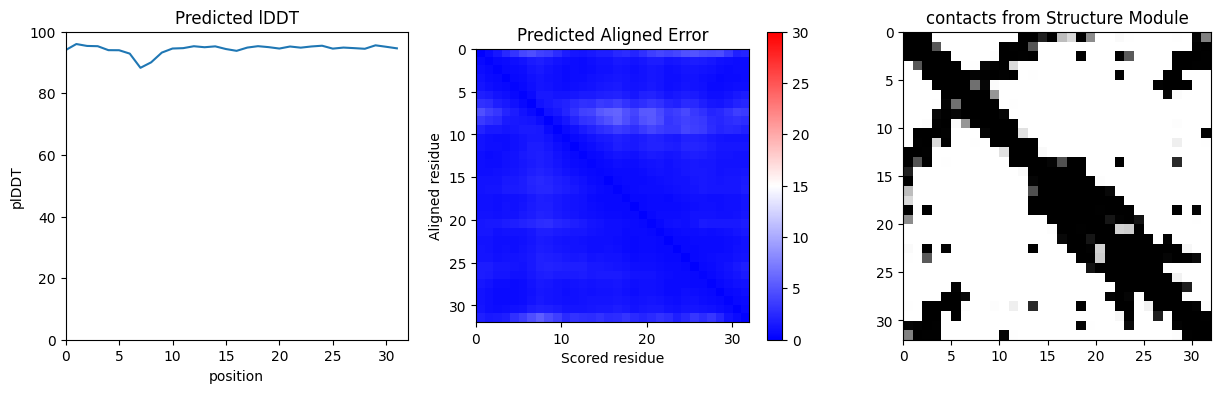

In [5]:
#@title plot confidence (optional)

dpi = 100 #@param {type:"integer"}

def plot_ticks(Ls):
  Ln = sum(Ls)
  L_prev = 0
  for L_i in Ls[:-1]:
    L = L_prev + L_i
    L_prev += L_i
    plt.plot([0,Ln],[L,L],color="black")
    plt.plot([L,L],[0,Ln],color="black")
  ticks = np.cumsum([0]+Ls)
  ticks = (ticks[1:] + ticks[:-1])/2
  plt.yticks(ticks,alphabet_list[:len(ticks)])

def plot_confidence(O, Ls=None, dpi=100):
  if "lm_contacts" in O:
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.subplot(1,4,1)
  else:
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.subplot(1,3,1)

  plt.title('Predicted lDDT')
  plt.plot(O["plddt"])
  if Ls is not None:
    L_prev = 0
    for L_i in Ls[:-1]:
      L = L_prev + L_i
      L_prev += L_i
      plt.plot([L,L],[0,100],color="black")
  plt.xlim(0,O["plddt"].shape[0])
  plt.ylim(0,100)
  plt.ylabel('plDDT')
  plt.xlabel('position')
  plt.subplot(1,4 if "lm_contacts" in O else 3,2)

  plt.title('Predicted Aligned Error')
  Ln = O["pae"].shape[0]
  plt.imshow(O["pae"],cmap="bwr",vmin=0,vmax=30,extent=(0, Ln, Ln, 0))
  if Ls is not None and len(Ls) > 1: plot_ticks(Ls)
  plt.colorbar()
  plt.xlabel('Scored residue')
  plt.ylabel('Aligned residue')

  if "lm_contacts" in O:
    plt.subplot(1,4,3)
    plt.title("contacts from LM")
    plt.imshow(O["lm_contacts"],cmap="Greys",vmin=0,vmax=1,extent=(0, Ln, Ln, 0))
    if Ls is not None and len(Ls) > 1: plot_ticks(Ls)
    plt.subplot(1,4,4)
  else:
    plt.subplot(1,3,3)
  plt.title("contacts from Structure Module")
  plt.imshow(O["sm_contacts"],cmap="Greys",vmin=0,vmax=1,extent=(0, Ln, Ln, 0))
  if Ls is not None and len(Ls) > 1: plot_ticks(Ls)
  return plt

plot_confidence(O, Ls=lengths, dpi=dpi)
plt.savefig(f'{prefix}.png',bbox_inches='tight')
plt.show()

In [6]:
#@title download predictions
from google.colab import files
os.system(f"zip {ID}.zip {ID}/*")
files.download(f'{ID}.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>